<h1><center>PyGol meets scikit-learn</center></h1>
<p>
This sheet demonstrates the usage  PyGol, an ILP system,  on a typical data science dataset(Tabular, CSV). PyGol is an ILP solution for <b><font color="red">automated machine learning and automated data science</font></b>. PyGol can be considered an <b><font color="red">Explainable learning</font></b> engine to the machine learning community. 
</p>
<p>
The need for in-depth knowledge to work with ILP algorithms, is
one of the disadvantages of most ILP systems from the data science perspective.
For example, Progol, Aleph and Metagol are well-known ILP systems, but they
cannot be used without user-defined mode declarations or meta-rules. The user
needs to have domain/data information to represent the problem and background
knowledge in logical representation, converting data into the correct format and
also define the right mode declaration or meta-rules, etc.</p>

## Load PyGol

In [1]:
import sys
sys.path.insert(0, '../../')
from pygol import *

## Load sklearn modules and other modules

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import  svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset into pandas dataframe

In [3]:
cancer = load_breast_cancer()
data = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

## Preparing Data and Targes for learning

In [4]:
## Selecting Feature Columns for PyGol
feature_col=data.columns[0:-1]

## Selecting Target Columns for PyGol
target=data.columns[-1]

##Selecting data and target for other machine learning algorithms
X = data.values[:,0:-1]
y = data.values[:,-1]

## PyGol data preprocessing

### 1.  Generate first-order logic rules as background knowledge for PyGol by deciding on grouping.

In [5]:
background=prepare_logic_rules(data,feature_col, meta_information="meta_data.info",
                               default_div=3, conditions={})

<font color="red">This function will generate a file, <b>"meta_data.info"</b>,  containing meta-information about the dataset and grouping.</font>

### 2. Generate Examples files

In [6]:
examples=prepare_examples(data,target)

<font color="red">ILP needs positive and negative examples for learning by the definition itself. If it's a multi-class classification, we must combine or alter the files according to meta-information. We create an example list automatically using the meta-information generated in the previous step.</font>

### 3. Generate Constant list

In [7]:
const=read_constants_meta_info()

### 4. Generate Bottom Clause

In [8]:
P, N = bottom_clause_generation(file="BK.pl", constant_set = const,  container = "memory",
                                positive_example="pos_example.f", negative_example="neg_example.n")

100%|██████████| 357/357 [00:01<00:00, 245.54it/s]


In [9]:
#P

## Fold Generation

In [10]:
folds=pygol_folds(folds=10, shuffle=True, positive_file_dictionary=P, negative_file_dictionary=N)

## Modelling using PyGol

In [11]:
model_1_CV=pygol_auto_cross_validation(folds, k_fold=10,  max_literals=2,   
                                       constant_set=const, min_pos=5, max_neg=1)

  0%|          | 0/321 [00:00<?, ?it/s]

+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-mean_perimeter(A,g1),worst_radius(A,g2)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-worst_concave_points(A,g2),worst_fractal_dimension(A,g0)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),symmetry_error(A,g2)', 'target(A):-smoothness_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_fractal_dimension(A,g1),worst_radius(A,g2)', 'target(A):-worst_radius(A,g2),worst_fractal_dimension(A,g1)', 'target(A):-fractal_dimension_error(A,g1),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),fractal_dimension_error(A,g2)', 'target(A):-area_error(A,g2),worst_smoothness(A,g2)', 'target(A):-mean_concave_points(A,g2),worst_texture(A,g2)', 'target(A):-worst_texture(A,g2),worst_concave_points(A,g2)']
+----------

100%|██████████| 321/321 [00:00<00:00, 2006515.03it/s]


+----------+ Training +----------+
['target(A):-mean_concave_points(A,g2),worst_concave_points(A,g2)', 'target(A):-concave_points_error(A,g0),worst_concave_points(A,g2)', 'target(A):-mean_perimeter(A,g1),worst_radius(A,g2)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-compactness_error(A,g0),worst_concave_points(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-mean_radius(A,g2),smoothness_error(A,g2)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_fractal_dimension(A,g2),worst_area(A,g2)', 'target(A):-mean_fractal_dimension(A,g1),worst_area(A,g2)', 'target(A):-symmetry_error(A,g1),worst_concave_points(A,g2)', 'target(A):-worst_radius(A,g2),worst_fractal_dimension(A,g1)', 'target(A):-fractal_dimension_error(A,g1),worst_radius(A,g2)', 'target(A):-fractal_dimension_error(A,g2),worst_radius(A,

100%|██████████| 321/321 [00:00<00:00, 2362055.41it/s]

+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-mean_concave_points(A,g2),radius_error(A,g0)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-worst_concave_points(A,g2),worst_fractal_dimension(A,g0)', 'target(A):-mean_concavity(A,g2),fractal_dimension_error(A,g0)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),symmetry_error(A,g2)', 'target(A):-mean_radius(A,g2),smoothness_error(A,g2)', 'target(A):-mean_radius(A,g2),mean_fractal_dimension(A,g1)', 'target(A):-worst_radius(A,g2),worst_fractal_dimension(A,g1)', 'target(A):-fractal_dimension_error(A,g1),worst_radius(A,g2)', 'target(A):-area_error(A,g2),worst_smoothness(A,g2)', 'target(A):-mean_radius(A,g2),mean_texture(A,g2)', 'target(A):-mean


100%|██████████| 321/321 [00:00<00:00, 1948439.34it/s]


+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-mean_perimeter(A,g1),worst_radius(A,g2)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_compactness(A,g0),worst_radius(A,g2)', 'target(A):-concave_points_error(A,g0),worst_radius(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-mean_smoothness(A,g0),worst_radius(A,g2)', 'target(A):-mean_texture(A,g2),texture_error(A,g0)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-mean_fractal_dimension(A,g2),worst_radius(A,g2)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),symmetry_error(A,g2)', 'target(A):-mean_fractal_dimension(A,g1),worst_area(A,g2)', 'target(A):-area_error(A,g2),worst_smoothness(A,g2)', 'target(A):-mean_texture(A,g2),worst_concave_points(A,g2)', 'target(A):-mean_concave_points(A,g2),worst_

100%|██████████| 321/321 [00:00<00:00, 2484080.41it/s]


+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-mean_perimeter(A,g1),worst_radius(A,g2)', 'target(A):-concave_points_error(A,g0),worst_concave_points(A,g2)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-worst_concave_points(A,g2),worst_fractal_dimension(A,g0)', 'target(A):-radius_error(A,g1),worst_radius(A,g2)', 'target(A):-perimeter_error(A,g1),worst_radius(A,g2)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-smoothness_error(A,g2),worst_radius(A,g2)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),smoothness_error(A,g2)', 'target(A):-symmetry_error(A,g1),worst_radius(A,g2)', 'target(A):-smoothness_error(A,g1),worst_radius(A,g2)', 'target(A):-area_error(A,g2),worst_smoothness(A,g2)', 'target(A):-mean_concave_points(A,g2

100%|██████████| 321/321 [00:00<00:00, 2439078.96it/s]


+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-concave_points_error(A,g0),worst_concave_points(A,g2)', 'target(A):-mean_area(A,g1),worst_radius(A,g2)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-worst_concave_points(A,g2),worst_fractal_dimension(A,g0)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-mean_fractal_dimension(A,g2),worst_radius(A,g2)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),symmetry_error(A,g2)', 'target(A):-mean_radius(A,g2),smoothness_error(A,g2)', 'target(A):-mean_fractal_dimension(A,g1),worst_area(A,g2)', 'target(A):-worst_radius(A,g2),worst_fractal_dimension(A,g1)', 'target(A):-concave_points_error(A,g1),worst_concave_points(A,g2)', 'target(A):-fractal_dimension_error(A,g1),worst_radius(A,g2)',

100%|██████████| 322/322 [00:00<00:00, 476558.18it/s]


+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-concave_points_error(A,g0),worst_concave_points(A,g2)', 'target(A):-mean_perimeter(A,g1),worst_radius(A,g2)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-mean_concavity(A,g2),worst_fractal_dimension(A,g0)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-mean_fractal_dimension(A,g2),worst_radius(A,g2)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),smoothness_error(A,g2)', 'target(A):-mean_fractal_dimension(A,g1),worst_area(A,g2)', 'target(A):-fractal_dimension_error(A,g1),worst_radius(A,g2)', 'target(A):-worst_radius(A,g2),worst_fractal_dimension(A,g1)', 'target(A):-area_error(A,g2),worst_smoothness(A,g2)', 'target(A):-mean_radius(A,g2),mean_texture(A,g2)', 'target(A):-mean

100%|██████████| 322/322 [00:00<00:00, 2221325.47it/s]

+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-concave_points_error(A,g0),worst_concave_points(A,g2)', 'target(A):-perimeter_error(A,g0),worst_radius(A,g2)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-worst_concave_points(A,g2),worst_fractal_dimension(A,g0)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-mean_fractal_dimension(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),smoothness_error(A,g2)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),worst_symmetry(A,g1)', 'target(A):-symmetry_error(A,g2),worst_area(A,g2)', 'target(A):-fractal_dimension_error(A,g1),worst_radius(A,g2)', 'target(A):-fractal_dimension_error(A,g2),worst_radius(A,g2)', 'target(A):-area_error(A,g2),worst_smoothness(A,g2)', 'target(A):-mea


100%|██████████| 322/322 [00:00<00:00, 2473563.90it/s]

+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-concave_points_error(A,g0),worst_concave_points(A,g2)', 'target(A):-mean_perimeter(A,g1),worst_radius(A,g2)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-worst_concave_points(A,g2),worst_fractal_dimension(A,g0)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),symmetry_error(A,g2)', 'target(A):-smoothness_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_fractal_dimension(A,g1),worst_radius(A,g2)', 'target(A):-worst_radius(A,g2),worst_fractal_dimension(A,g1)', 'target(A):-mean_radius(A,g2),fractal_dimension_error(A,g2)', 'target(A):-fractal_dimension_error(A,g1),worst_radius(A,g2)', 'target(A):-area_error(A,g2),worst_smoothness(A,g2)', 'targ

+----------+ Training +----------+
['target(A):-worst_perimeter(A,g2),worst_concave_points(A,g2)', 'target(A):-mean_area(A,g1),worst_radius(A,g2)', 'target(A):-compactness_error(A,g0),worst_concavity(A,g2)', 'target(A):-mean_concavity(A,g2),compactness_error(A,g0)', 'target(A):-mean_radius(A,g1),worst_radius(A,g2)', 'target(A):-worst_concave_points(A,g2),worst_fractal_dimension(A,g0)', 'target(A):-mean_compactness(A,g2),mean_fractal_dimension(A,g0)', 'target(A):-mean_fractal_dimension(A,g2),worst_radius(A,g2)', 'target(A):-symmetry_error(A,g2),worst_radius(A,g2)', 'target(A):-smoothness_error(A,g2),worst_radius(A,g2)', 'target(A):-mean_radius(A,g2),smoothness_error(A,g2)', 'target(A):-mean_fractal_dimension(A,g1),worst_area(A,g2)', 'target(A):-mean_radius(A,g2),fractal_dimension_error(A,g2)', 'target(A):-worst_radius(A,g2),worst_fractal_dimension(A,g1)', 'target(A):-fractal_dimension_error(A,g1),worst_radius(A,g2)', 'target(A):-concavity_error(A,g1),worst_concave_points(A,g2)', 'target

In [12]:
np.mean(model_1_CV.accuracy)

0.9332

## Modelling with typical machine learning

Naive Bayes: 0.936779 (0.028444)
SVM: 0.924373 (0.021107)
DT: 0.917419 (0.032351)
Perc.: 0.896366 (0.034483)
MLP: 0.928039 (0.029768)
PyGol: 0.933200 (0.032174)


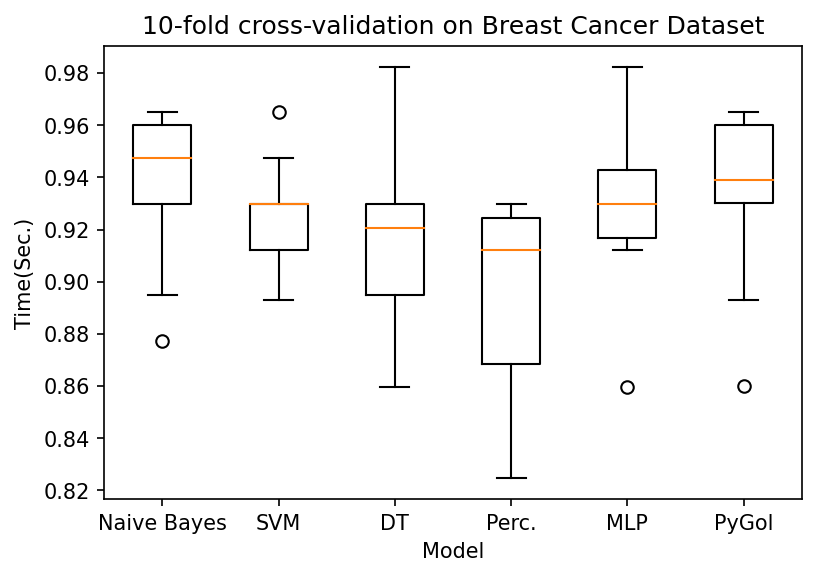

In [14]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', svm.SVC(gamma=0.001)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('Perc.', Perceptron(eta0=0.1, random_state=0, max_iter=1000)))
models.append(('MLP', MLPClassifier( activation='logistic', hidden_layer_sizes=(1000,), max_iter=1000)))
results = []
names = []
means_set=[]
error_set=[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    means_set.append(cv_results.mean())
    error_set.append(cv_results.std())
print('%s: %f (%f)' % ("PyGol", np.mean(model_1_CV.accuracy), np.std(model_1_CV.accuracy)))

fig = pyplot.figure(dpi=150)
results.append(np.array(model_1_CV.accuracy))
means_set.append(np.mean(model_1_CV.accuracy))
error_set.append(np.std(model_1_CV.accuracy))
names.append("PyGol")
pyplot.boxplot(results, labels=names)
pyplot.ylabel('Time(Sec.)')
pyplot.xlabel('Model')
pyplot.title('10-fold cross-validation on Breast Cancer Dataset')
pyplot.show()